In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Reshape, Dropout
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from tensorflow.keras.layers import ReLU
import os,cv2
import json
import glob
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow import keras
import h5py
import matplotlib.image as img
%matplotlib inline

In [2]:
!pip install split-folders
import splitfolders
splitfolders.ratio('D:/Project/Alzheimer_ disease/dataset/', output="output", seed=1345, ratio=(.8, 0.1,0.1)) 

Copying files: 6400 files [00:06, 1066.50 files/s]


In [3]:
IMG_HEIGHT = 128
IMG_WIDTH = 128
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
'D:/Project/Alzheimer_ disease/output/train/',
seed=123,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size=16
)

Found 5119 files belonging to 4 classes.


In [4]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
'D:/Project/Alzheimer_ disease/output/test/',
seed=123,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size=32
)

Found 642 files belonging to 4 classes.


In [5]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
'D:/Project/Alzheimer_ disease/output/val/',
seed=123,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size=32
)

Found 639 files belonging to 4 classes.


In [6]:
class_names = train_ds.class_names
print(class_names)
train_ds

['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']


<BatchDataset shapes: ((None, 128, 128, 3), (None,)), types: (tf.float32, tf.int32)>

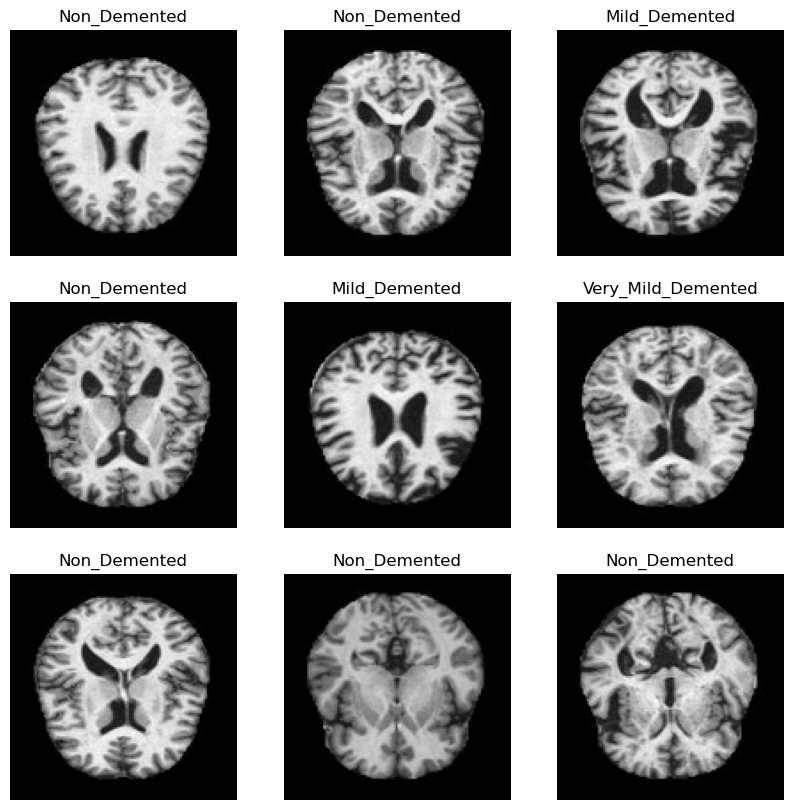

In [7]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

<function matplotlib.pyplot.show(close=None, block=None)>

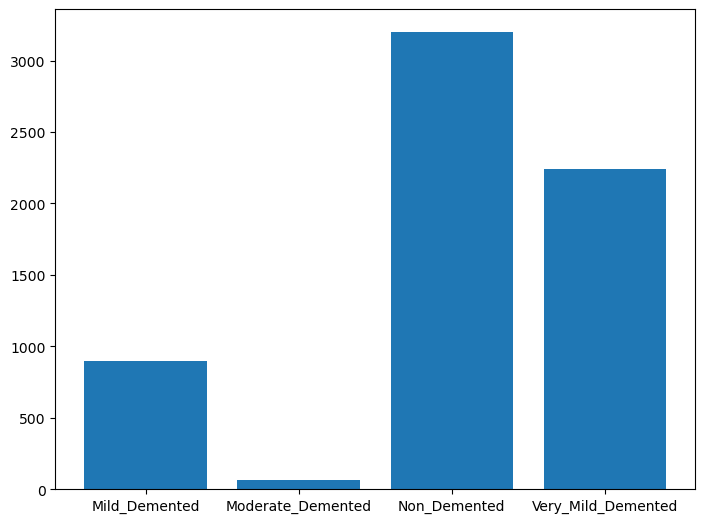

In [8]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
size = [896,64,3200,2240]
ax.bar(class_names,size)
plt.show

In [9]:
model = Sequential([
    keras.layers.Convolution2D(256, 3, activation='relu', padding='same', input_shape=(128,128,3), kernel_initializer="he_normal", strides=1),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Convolution2D(256, 3, activation='relu', padding='same', kernel_initializer="he_normal", strides=1),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Convolution2D(128, 3, activation='relu', padding='same', kernel_initializer="he_normal", strides=1),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(0.2),
    keras.layers.Convolution2D(64, 3, activation='relu', padding='same', kernel_initializer="he_normal", strides=1),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Convolution2D(32, 3, activation='relu', padding='same', kernel_initializer="he_normal", strides=1),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu', kernel_initializer="he_normal"),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(4, activation='softmax')
    ])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 256)     7168      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 256)       590080    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)       295040    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 128)       0

In [11]:
model.compile(loss="sparse_categorical_crossentropy", optimizer = "Adam",metrics=["accuracy"])

In [12]:
hist = model.fit(train_ds,validation_data=val_ds,epochs=200, batch_size=16, verbose=1)

Epoch 1/200
320/320 [==============================] - 23s 58ms/step - loss: 13.7514 - accuracy: 0.4225 - val_loss: 1.0581 - val_accuracy: 0.4679
Epoch 2/200
320/320 [==============================] - 14s 44ms/step - loss: 1.1146 - accuracy: 0.4587 - val_loss: 0.9858 - val_accuracy: 0.5149
Epoch 3/200
320/320 [==============================] - 14s 45ms/step - loss: 1.0686 - accuracy: 0.4765 - val_loss: 0.9472 - val_accuracy: 0.5524
Epoch 4/200
320/320 [==============================] - 14s 45ms/step - loss: 1.0382 - accuracy: 0.4868 - val_loss: 1.0118 - val_accuracy: 0.5117
Epoch 5/200
320/320 [==============================] - 14s 45ms/step - loss: 0.9990 - accuracy: 0.5124 - val_loss: 0.9948 - val_accuracy: 0.5587
Epoch 6/200
320/320 [==============================] - 14s 44ms/step - loss: 0.9738 - accuracy: 0.5247 - val_loss: 0.9322 - val_accuracy: 0.6213
Epoch 7/200
320/320 [==============================] - 15s 47ms/step - loss: 0.9830 - accuracy: 0.5177 - val_loss: 0.8849 - val_a

320/320 [==============================] - 15s 45ms/step - loss: 0.1414 - accuracy: 0.9512 - val_loss: 0.1681 - val_accuracy: 0.9390
Epoch 58/200
320/320 [==============================] - 15s 45ms/step - loss: 0.1424 - accuracy: 0.9494 - val_loss: 0.1607 - val_accuracy: 0.9499
Epoch 59/200
320/320 [==============================] - 14s 45ms/step - loss: 0.1431 - accuracy: 0.9502 - val_loss: 0.4483 - val_accuracy: 0.8685
Epoch 60/200
320/320 [==============================] - 15s 45ms/step - loss: 0.1486 - accuracy: 0.9504 - val_loss: 0.1826 - val_accuracy: 0.9405
Epoch 61/200
320/320 [==============================] - 15s 45ms/step - loss: 0.1299 - accuracy: 0.9564 - val_loss: 0.1723 - val_accuracy: 0.9374
Epoch 62/200
320/320 [==============================] - 15s 45ms/step - loss: 0.1326 - accuracy: 0.9570 - val_loss: 0.0952 - val_accuracy: 0.9718
Epoch 63/200
320/320 [==============================] - 15s 45ms/step - loss: 0.1401 - accuracy: 0.9514 - val_loss: 0.1312 - val_accuracy

320/320 [==============================] - 15s 45ms/step - loss: 0.1054 - accuracy: 0.9699 - val_loss: 0.1174 - val_accuracy: 0.9687
Epoch 114/200
320/320 [==============================] - 15s 46ms/step - loss: 0.0810 - accuracy: 0.9736 - val_loss: 0.0948 - val_accuracy: 0.9703
Epoch 115/200
320/320 [==============================] - 15s 45ms/step - loss: 0.0748 - accuracy: 0.9783 - val_loss: 0.1613 - val_accuracy: 0.9656
Epoch 116/200
320/320 [==============================] - 14s 45ms/step - loss: 0.0919 - accuracy: 0.9766 - val_loss: 0.0783 - val_accuracy: 0.9812
Epoch 117/200
320/320 [==============================] - 14s 45ms/step - loss: 0.1658 - accuracy: 0.9533 - val_loss: 0.2086 - val_accuracy: 0.9562
Epoch 118/200
320/320 [==============================] - 14s 45ms/step - loss: 0.1615 - accuracy: 0.9560 - val_loss: 0.1175 - val_accuracy: 0.9687
Epoch 119/200
320/320 [==============================] - 15s 46ms/step - loss: 0.1541 - accuracy: 0.9603 - val_loss: 0.2816 - val_ac

Epoch 169/200
320/320 [==============================] - 15s 46ms/step - loss: 0.1098 - accuracy: 0.9660 - val_loss: 0.1203 - val_accuracy: 0.9640
Epoch 170/200
320/320 [==============================] - 15s 45ms/step - loss: 0.0811 - accuracy: 0.9773 - val_loss: 0.1186 - val_accuracy: 0.9734
Epoch 171/200
320/320 [==============================] - 15s 45ms/step - loss: 0.0666 - accuracy: 0.9803 - val_loss: 0.1562 - val_accuracy: 0.9640
Epoch 172/200
320/320 [==============================] - 14s 45ms/step - loss: 0.2502 - accuracy: 0.9308 - val_loss: 0.2285 - val_accuracy: 0.9624
Epoch 173/200
320/320 [==============================] - 15s 45ms/step - loss: 0.2223 - accuracy: 0.9461 - val_loss: 0.3320 - val_accuracy: 0.8404
Epoch 174/200
320/320 [==============================] - 15s 45ms/step - loss: 0.2355 - accuracy: 0.9285 - val_loss: 0.4714 - val_accuracy: 0.8560
Epoch 175/200
320/320 [==============================] - 15s 46ms/step - loss: 0.5563 - accuracy: 0.8179 - val_loss: 0

In [13]:
model.save('model.h5')
print('Model saved!!')

Model saved!!


In [14]:
accuracy = hist.history['accuracy']
loss = hist.history['loss']
val_acc = hist.history['val_accuracy']
val_loss = hist.history['val_loss']

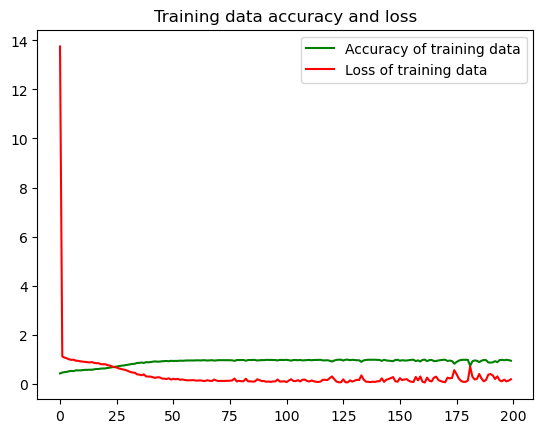

<Figure size 640x480 with 0 Axes>

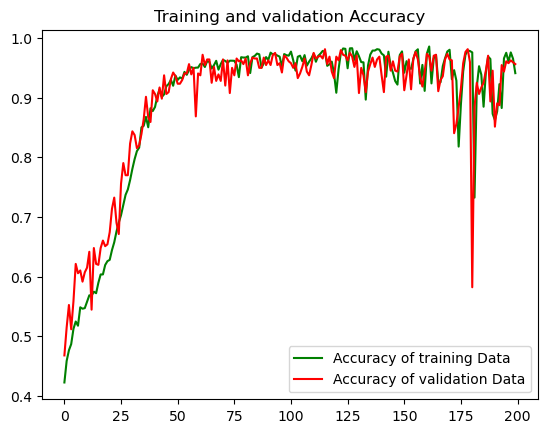

<Figure size 640x480 with 0 Axes>

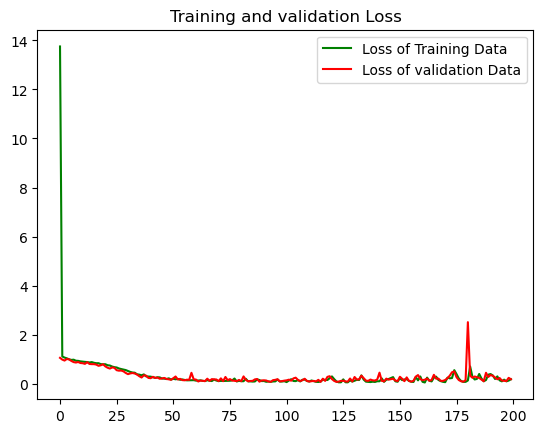

<Figure size 640x480 with 0 Axes>

In [15]:
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'g', label='Accuracy of training data')
plt.plot(epochs, loss, 'r', label='Loss of training data')
plt.title('Training data accuracy and loss')
plt.legend(loc=0)
plt.figure()
plt.show()


plt.plot(epochs, accuracy, 'g', label='Accuracy of training Data')
plt.plot(epochs, val_acc, 'r', label='Accuracy of validation Data')
plt.title('Training and validation Accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()


plt.plot(epochs, loss, 'g', label='Loss of Training Data')
plt.plot(epochs, val_loss, 'r', label='Loss of validation Data')
plt.title('Training and validation Loss')
plt.legend(loc=0)
plt.figure()
plt.show()


In [16]:
loss, accuracy = model.evaluate(test_ds)

21/21 [==============================] - 1s 42ms/step - loss: 0.1723 - accuracy: 0.9439


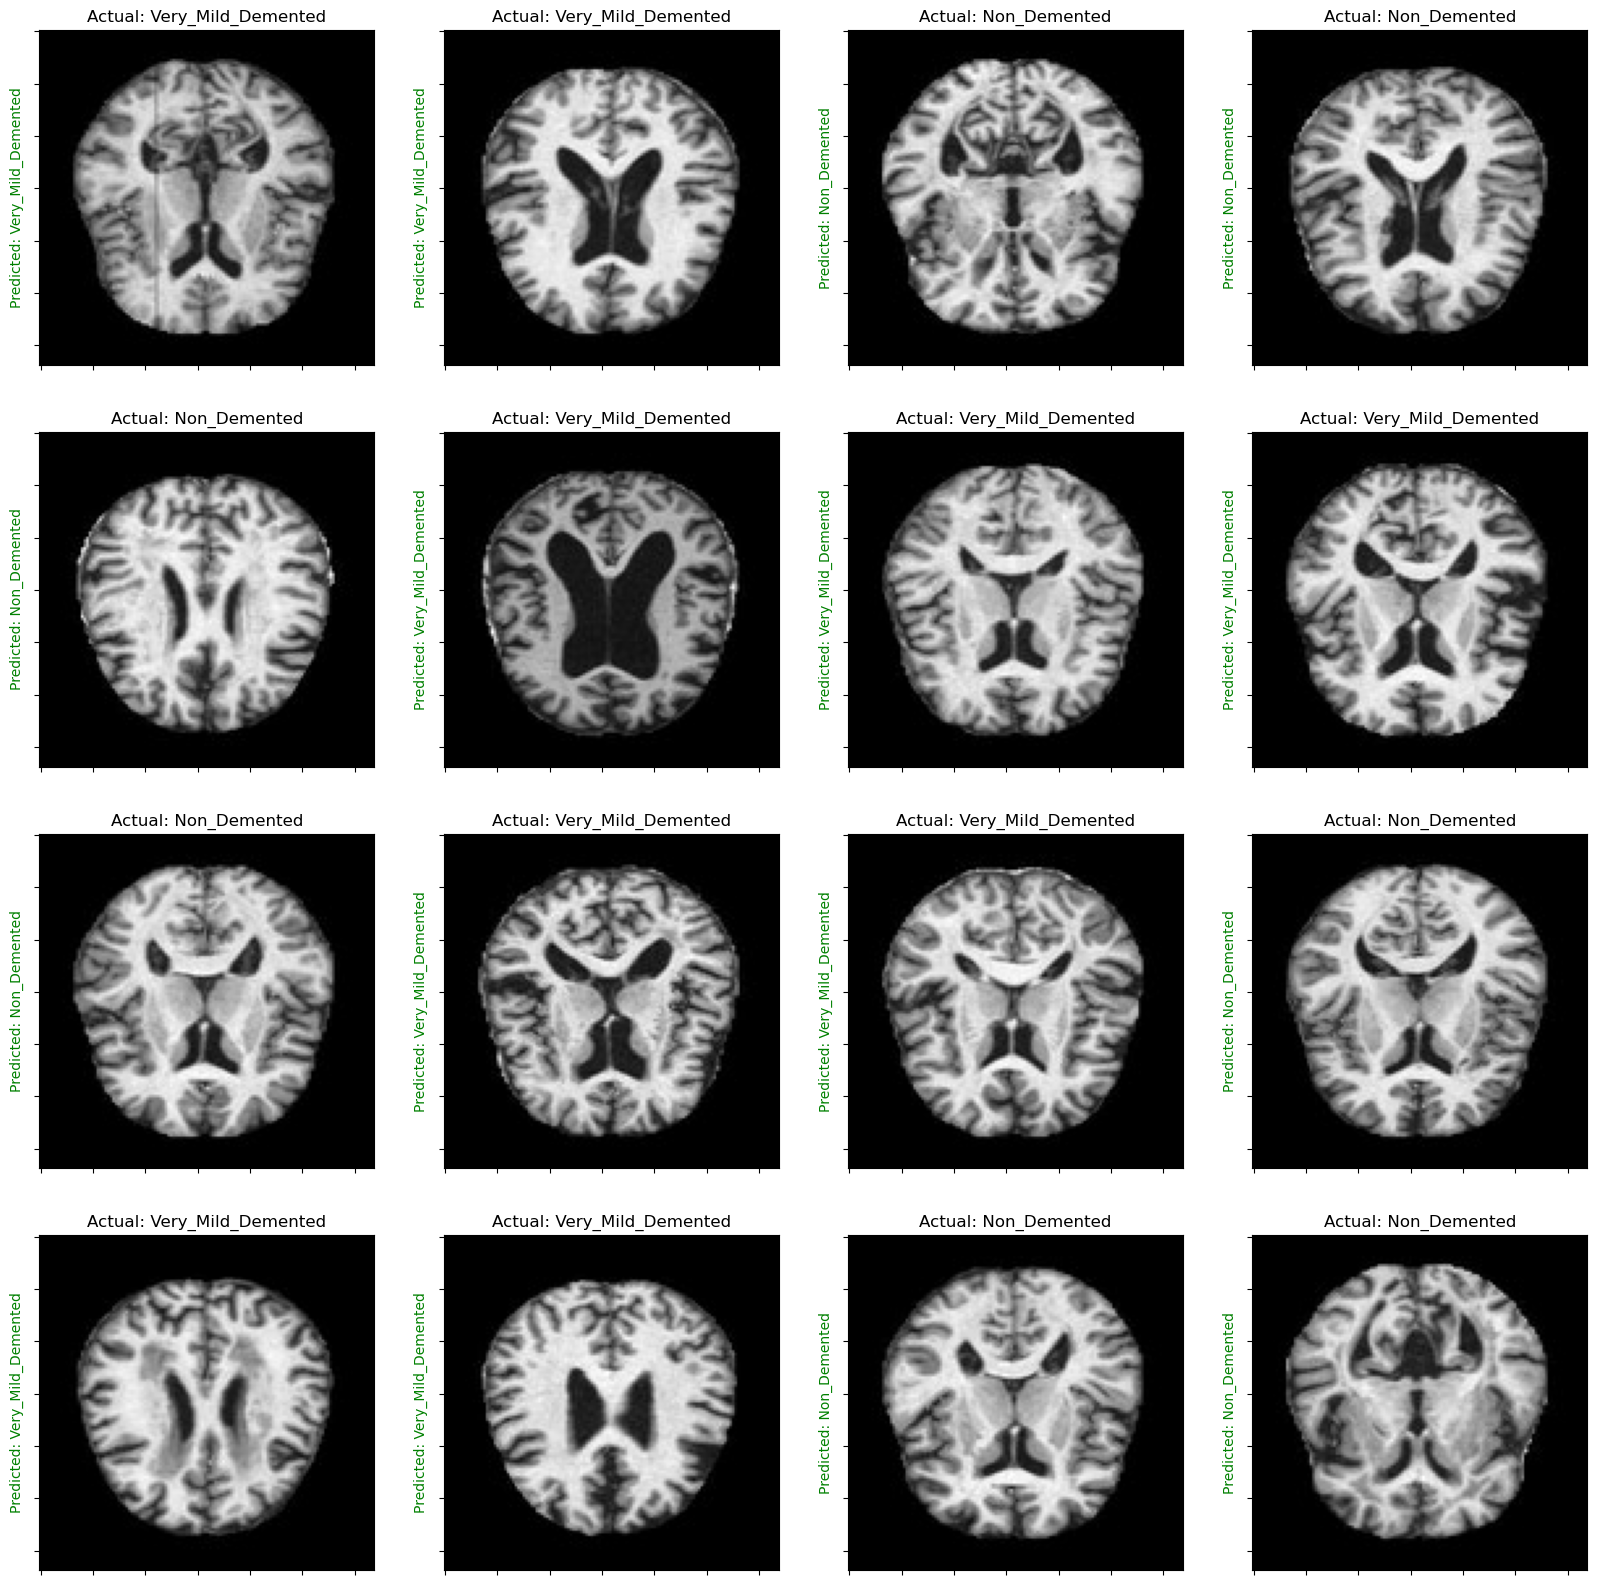

In [17]:
plt.figure(figsize=(20, 20))
for images, labels in test_ds.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predictions = model.predict(tf.expand_dims(images[i], 0))
        score = tf.nn.softmax(predictions[0])
        if(class_names[labels[i]]==class_names[np.argmax(score)]):
            plt.title("Actual: "+class_names[labels[i]])
            plt.ylabel("Predicted: "+class_names[np.argmax(score)],fontdict={'color':'green'})
            
        else:
            plt.title("Actual: "+class_names[labels[i]])
            plt.ylabel("Predicted: "+class_names[np.argmax(score)],fontdict={'color':'red'})
        plt.gca().axes.yaxis.set_ticklabels([])        
        plt.gca().axes.xaxis.set_ticklabels([])

Done